In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#TODO: change to relative file path
lou_file_path = r"C:\Users\jmpur\Downloads\Louisville_Metro_KY_-_Animal_Service_Intake_and_Outcome.csv"
sonoma_file_path = r"C:\Users\jmpur\Downloads\Animal_Shelter_Intake_and_Outcome.csv"

lou_df = pd.read_csv(lou_file_path)
sonoma_df = pd.read_csv(sonoma_file_path)

lou_df = lou_df.drop(columns=['kennel', 'animalid', 'bites', 'ObjectId'])
sonoma_df = sonoma_df.drop(columns=['Name', 'Date Of Birth', 'Impound Number', 'Kennel Number', 
                        'Animal ID', 'Days in Shelter', 'Intake Condition', 'Outcome Condition',
                        'Intake Jurisdiction', 'Outcome Jurisdiction', 'Location', 'Count'] )

df = pd.concat([lou_df, sonoma_df])

# df = lou_df.dropna()

df

,jurisdiction,intype,insubtype,indate,surreason,outtype,outsubtype,outdate,animaltype,sex,...,Color,Sex,Size,Intake Date,Outcome Date,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Outcome Zip Code
0,40243,STRAY,FIELD,2021/09/02 00:00:00,STRAY,ADOPTION,REFERRAL,2021/09/07 00:00:00,DOG,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40215,OWNER SUR,EUTH REQ,2019/01/11 00:00:00,EUTH MED,EUTH,REQUESTED,2019/01/11 00:00:00,DOG,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40291,STRAY,OTC,2020/01/10 00:00:00,STRAY,RTO,IN KENNEL,2020/01/10 00:00:00,DOG,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40222,CONFISCATE,OWNER DIED,2020/09/21 00:00:00,OWNER DIED,EUTH,INHUMANE,2020/09/21 00:00:00,DOG,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40216,STRAY,OTC,2022/11/14 00:00:00,STRAY,RTO,IN KENNEL,2022/11/19 00:00:00,DOG,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CHOCOLATE/WHITE,Spayed,MED,11/01/2017,11/02/2017,STRAY,FIELD,RETURN TO OWNER,FLD_MCHIP,95405.0
26619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BRN TABBY/WHITE,Neutered,SMALL,08/14/2014,08/23/2014,STRAY,COMM CAT,ADOPTION,WALKIN,95492.0
26620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BROWN,Neutered,MED,12/07/2016,12/07/2016,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_WEB,95401.0
26621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BLUE CREAM,Spayed,KITTN,08/16/2022,09/29/2022,STRAY,OVER THE COUNTER,ADOPTION,WALKIN,95403.0


In [2]:
df.dtypes
# the indate & outdate columns are currently objects
# let's change them to datetime

kennel           object
animalid         object
jurisdiction     object
intype           object
insubtype        object
indate           object
surreason        object
outtype          object
outsubtype       object
outdate          object
animaltype       object
sex              object
bites            object
petsize          object
color            object
breed            object
sourcezipcode    object
ObjectId          int64
dtype: object

In [3]:
# change indate & outdate columns to datetime
# remove time from dates
# ".loc :" is used for avoiding SettingWithCopyWarning
df.loc[:, 'indate'] = pd.to_datetime(df['indate']).dt.date
df.loc[:, 'outdate'] = pd.to_datetime(df['outdate']).dt.date

df

,kennel,animalid,jurisdiction,intype,insubtype,indate,surreason,outtype,outsubtype,outdate,animaltype,sex,bites,petsize,color,breed,sourcezipcode,ObjectId
0,605,A492190,40243,STRAY,FIELD,2021-09-02,STRAY,ADOPTION,REFERRAL,2021-09-07,DOG,N,N,LARGE,BL BRINDLE,PIT BULL / MIX,40218,1
1,INTAKE,A497115,40215,OWNER SUR,EUTH REQ,2019-01-11,EUTH MED,EUTH,REQUESTED,2019-01-11,DOG,M,N,PUPPY,BLACK / RED,DOBERMAN PINSCH,40215,2
2,INTAKE,A307550,40291,STRAY,OTC,2020-01-10,STRAY,RTO,IN KENNEL,2020-01-10,DOG,N,N,MED,BROWN,BASSET HOUND / BASSET HOUND,40291,3
3,ACO UNIT,A331757,40222,CONFISCATE,OWNER DIED,2020-09-21,OWNER DIED,EUTH,INHUMANE,2020-09-21,DOG,N,N,LARGE,YELLOW,LABRADOR RETR,40243,4
4,902,A571544,40216,STRAY,OTC,2022-11-14,STRAY,RTO,IN KENNEL,2022-11-19,DOG,M,N,LARGE,GOLD,GOLDEN RETR,40216,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54481,K109,A677601,40202,STRAY,FIELD,2020-02-22,STRAY,RTO,IN KENNEL,2020-02-22,DOG,S,N,SMALL,TAN / WHITE,CHIHUAHUA LH,40218,54482
54484,404,A677801,40210,OWNER SUR,EUTH REQ,2020-02-27,AGG ANIMAL,TRANSPORT,RESCUE GRP,2020-03-04,DOG,S,N,LARGE,BROWN,BOXER / GERM SHEPHERD,40210,54485
54485,N16,A677998,40208,STRAY,OTC,2020-03-04,STRAY,TRANSFER,KHS,2020-03-12,DOG,N,N,LARGE,BR BRINDLE,DUTCH SHEPHERD / MIX,40214,54486
54490,N17,A735508,40219,STRAY,OTC,2023-03-31,STRAY,FOSTER,TIME/SPACE,2023-04-15,DOG,N,N,LARGE,BROWN / BLACK,BELG MALINOIS / ALASKAN HUSKY,40219,54491


In [4]:
# create columns that pull years from the indate & outdate columns
# place the created columns next to the indate & outdate columns
df.insert(6, 'indate year', pd.to_datetime(df['indate']).dt.year)
df.insert(11, 'outdate year', pd.to_datetime(df['outdate']).dt.year)

df

,kennel,animalid,jurisdiction,intype,insubtype,indate,indate year,surreason,outtype,outsubtype,outdate,outdate year,animaltype,sex,bites,petsize,color,breed,sourcezipcode,ObjectId
0,605,A492190,40243,STRAY,FIELD,2021-09-02,2021,STRAY,ADOPTION,REFERRAL,2021-09-07,2021,DOG,N,N,LARGE,BL BRINDLE,PIT BULL / MIX,40218,1
1,INTAKE,A497115,40215,OWNER SUR,EUTH REQ,2019-01-11,2019,EUTH MED,EUTH,REQUESTED,2019-01-11,2019,DOG,M,N,PUPPY,BLACK / RED,DOBERMAN PINSCH,40215,2
2,INTAKE,A307550,40291,STRAY,OTC,2020-01-10,2020,STRAY,RTO,IN KENNEL,2020-01-10,2020,DOG,N,N,MED,BROWN,BASSET HOUND / BASSET HOUND,40291,3
3,ACO UNIT,A331757,40222,CONFISCATE,OWNER DIED,2020-09-21,2020,OWNER DIED,EUTH,INHUMANE,2020-09-21,2020,DOG,N,N,LARGE,YELLOW,LABRADOR RETR,40243,4
4,902,A571544,40216,STRAY,OTC,2022-11-14,2022,STRAY,RTO,IN KENNEL,2022-11-19,2022,DOG,M,N,LARGE,GOLD,GOLDEN RETR,40216,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54481,K109,A677601,40202,STRAY,FIELD,2020-02-22,2020,STRAY,RTO,IN KENNEL,2020-02-22,2020,DOG,S,N,SMALL,TAN / WHITE,CHIHUAHUA LH,40218,54482
54484,404,A677801,40210,OWNER SUR,EUTH REQ,2020-02-27,2020,AGG ANIMAL,TRANSPORT,RESCUE GRP,2020-03-04,2020,DOG,S,N,LARGE,BROWN,BOXER / GERM SHEPHERD,40210,54485
54485,N16,A677998,40208,STRAY,OTC,2020-03-04,2020,STRAY,TRANSFER,KHS,2020-03-12,2020,DOG,N,N,LARGE,BR BRINDLE,DUTCH SHEPHERD / MIX,40214,54486
54490,N17,A735508,40219,STRAY,OTC,2023-03-31,2023,STRAY,FOSTER,TIME/SPACE,2023-04-15,2023,DOG,N,N,LARGE,BROWN / BLACK,BELG MALINOIS / ALASKAN HUSKY,40219,54491


In [5]:
#How many total animals are in this study?
print("Total animals:", df.animalid.nunique())

Total animals: 25346


In [6]:
#How many of EACH animal is in the study?
print(df.value_counts('animaltype').head()) 
print(df.value_counts('breed').head())

animaltype
DOG       19228
CAT       12946
OTHER       292
RABBIT      264
BIRD         75
Name: count, dtype: int64
breed
DOMESTIC SH            10847
PIT BULL                3816
DOMESTIC MH             1191
PIT BULL / MIX          1062
LABRADOR RETR / MIX      960
Name: count, dtype: int64


In [7]:
# why were the animals taken in? why were they taken out?
print(df.intype.value_counts(), df.outtype.value_counts())
#, df.insubtype.value_counts()

intype
STRAY         22265
FOSTER         5944
OWNER SUR      2051
RETURN         1085
CONFISCATE      865
DISPOSAL        660
FOR TRANSP       21
Name: count, dtype: int64 outtype
ADOPTION     12369
FOSTER        5348
RTO           5212
TRANSFER      3737
EUTH          2811
TNR           1647
DISPOSAL       881
TRANSPORT      481
DIED           382
LOST            21
RELEASE          2
Name: count, dtype: int64


In [8]:
# conn = sqlite3.connect('animal_data.db')
# cur = conn.cursor()

# df.to_sql('table1', conn, if_exists='replace', index=False)

# test1 = pd.read_sql_query("SELECT * FROM table1 WHERE intype='STRAY'", conn)
# print(test1)

# conn.close()


   year  count
1  2019   7317
4  2020   5452
2  2021   6718
0  2022   7605
3  2023   5799


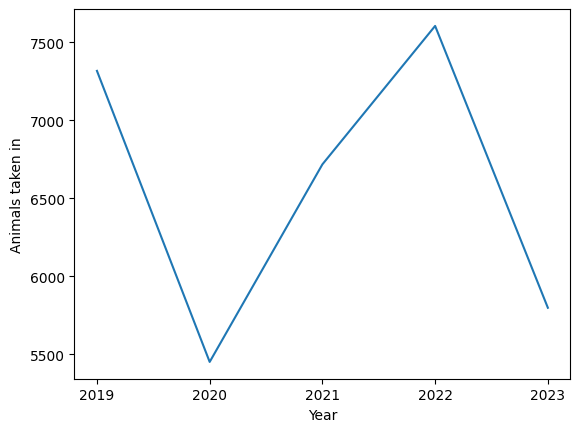

In [9]:
#line graph
#number of intakes over the years
#print(df.value_counts('indate year'), df.value_counts('outdate year'))
indate_df = df.value_counts('indate year').reset_index().sort_values(['indate year'])
indate_df.columns = ['year', 'count']

print(indate_df)

#change X axis to only show integers
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(indate_df['year'], indate_df['count'])
plt.xlabel('Year')
plt.ylabel('Animals taken in')
plt.show()

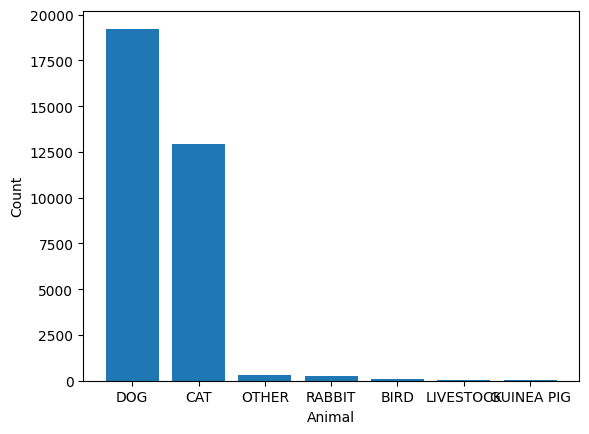

In [10]:
#bar graph
#how many of each animal did LMAS serve?
animal_count_df = df.value_counts('animaltype').reset_index()
animal_count_df.columns = ['animal', 'count']
animal_count_df.sort_values(['count'])

plt.bar(animal_count_df['animal'], animal_count_df['count'])
plt.xlabel('Animal')
plt.ylabel('Count')
plt.show()

In [11]:
#what are the most common dog breeds in LMAS?

dog_df = df.loc[df['animaltype'] == 'DOG']

# print(dog_df.value_counts('intype'))
# print(dog_df.value_counts('outtype'))
print(dog_df.value_counts('breed').head(10))

# explore dog adoption stats
# adopted_dog_df = dog_df.loc[dog_df['outtype'] == 'ADOPTION']
# print(adopted_dog_df.value_counts('outsubtype'))



breed
PIT BULL               3816
PIT BULL / MIX         1062
LABRADOR RETR / MIX     960
GERM SHEPHERD           765
LABRADOR RETR           671
CHIHUAHUA SH            448
GERM SHEPHERD / MIX     430
BEAGLE                  420
BOXER / MIX             373
BEAGLE / MIX            327
Name: count, dtype: int64


In [12]:
#where are these animals coming from (ZIP codes)?

print(df.value_counts('sourcezipcode').head(10))
# significant majority of animals are from 40218, the same zip code as Lou Animal Services east campus
# Lou Animal Services west campus is 40215

sourcezipcode
40218    4756
40216    2029
40214    1995
40215    1779
40272    1710
40219    1547
40229    1243
40258    1216
40212    1170
40208    1101
Name: count, dtype: int64
